In [22]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv('train.csv')
df.head()




,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [25]:
df.describe()


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [26]:
print("Ci sono",len(set(df["brand"])),"brand diversi.")
print("Ci sono",len(set(df["model_year"])), "anni diversi.")
print("Ci sono",len(set(df["model"])),"modelli diversi.")
print("Ci sono",len(set(df["fuel_type"])), "fuel_type diversi.")
print("Ci sono",len(set(df["engine"])),"engine diversi.")
print("Ci sono",len(set(df["transmission"])), "trasmissioni diverse.")
print("Ci sono",len(set(df["ext_col"])),"ext_col diversi.")
print("Ci sono",len(set(df["int_col"])), "int_col diverse.")
print("Ci sono",len(set(df["accident"])), "acciden diverse.")
print("Ci sono",len(set(df["clean_title"])),"clean_title diversi.")
print("Ci sono",len(set(df["price"])), "price diversi.")
        

Ci sono 57 brand diversi.
Ci sono 34 anni diversi.
Ci sono 1897 modelli diversi.
Ci sono 8 fuel_type diversi.
Ci sono 1117 engine diversi.
Ci sono 52 trasmissioni diverse.
Ci sono 319 ext_col diversi.
Ci sono 156 int_col diverse.
Ci sono 3 acciden diverse.
Ci sono 2 clean_title diversi.
Ci sono 1569 price diversi.


In [27]:
df['accident'] = df['accident'].fillna(-1)
df["accident"].replace("None reported", 0, inplace = True)


/tmp/ipykernel_25574/3213447204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["accident"].replace("None reported", 0, inplace = True)


In [28]:
df["accident"].replace("At least 1 accident or damage reported", 1, inplace = True)

/tmp/ipykernel_25574/1854286251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["accident"].replace("At least 1 accident or damage reported", 1, inplace = True)
/tmp/ipykernel_25574/1854286251.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["accident"].replace("At least 1 accident or d

In [29]:
df['accident']

0         0
1         1
2         0
3         0
4         0
         ..
188528    0
188529    1
188530    0
188531    0
188532    0
Name: accident, Length: 188533, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  int64 
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.7+ MB


In [31]:
df['clean_title'] = df['clean_title'].fillna('No')

In [32]:
df["clean_title"].replace("No", 0, inplace = True)
df["clean_title"].replace("Yes", 1, inplace = True)

/tmp/ipykernel_25574/3531031253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["clean_title"].replace("No", 0, inplace = True)
/tmp/ipykernel_25574/3531031253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [33]:
df['fuel_type'] = df['fuel_type'].fillna(-1)

In [34]:
model_price = df.groupby('model_year')['price'].mean()
print("Prezzo per anno modello:\n", model_price)

Prezzo per anno modello:
 model_year
1974    74124.083333
1992    26957.000000
1993    38091.871429
1994    50181.760870
1995    38205.872549
1996    17370.894180
1997    14586.419872
1998    13442.169096
1999    10702.705776
2000    13796.912186
2001    19227.459583
2002    21286.650546
2003    17021.920252
2004    19401.310506
2005    26376.852029
2006    18351.585288
2007    19449.327112
2008    20384.406711
2009    21522.417894
2010    19964.660449
2011    18084.812450
2012    19806.953897
2013    23437.342702
2014    24758.274866
2015    30974.878567
2016    33531.819655
2017    37943.234329
2018    47707.568722
2019    49375.295606
2020    61556.784074
2021    65893.857951
2022    72732.327005
2023    95707.912305
2024    78006.067901
Name: price, dtype: float64


In [35]:
df = df.drop(['model','fuel_type','engine', 'transmission', 'ext_col', 'int_col', 'id'], axis=1)

In [ ]:
brands= df['brand'].unique()
#un for che attraverso un cut ci va a prendere ogni singolo brand creando n dataframe e poi per ogni n heatmap.

In [ ]:
df_brand_list= []
filtered_corr= []
for brand in brands:
    
    df_brand_list.append(df[df['brand'] == brand])

for df_brand in df_brand_list:
    brand_nome = df_brand['brand'].iloc[0]
    df_brand.drop('brand', axis=1, inplace=True)
    
    corr_matrix = df_brand.corr()  
    filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3))& (corr_matrix != 1)).stack()
    filtered_corr.append((f'Brand name: {brand_nome}\n',filtered))
    
print(filtered_corr)
    
    
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    # plt.title(f'Heatmap for Brand: {brand_nome}')
    
    # #esportarle in png 
    
    
    
    
    # plt.savefig(f'./image/{brand_nome}_heatmap.png',  bbox_inches='tight')
    
    
    
    
    


    
    
    

    
    
    
    

/tmp/ipykernel_25574/2585389447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop('brand', axis=1, inplace=True)
/tmp/ipykernel_25574/2585389447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop('brand', axis=1, inplace=True)
/tmp/ipykernel_25574/2585389447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop('brand', axis=1, inplace=True)
/tmp/ipykernel_25574/2585389447.py:9: SettingWithCop

[('Brand name: MINI', model_year  milage       -0.458579
            price         0.534950
milage      model_year   -0.458579
            price        -0.521113
price       model_year    0.534950
            milage       -0.521113
dtype: float64), ('Brand name: Lincoln', model_year  milage       -0.698952
            price         0.429888
milage      model_year   -0.698952
            price        -0.460630
price       model_year    0.429888
            milage       -0.460630
dtype: float64), ('Brand name: Chevrolet', model_year  milage       -0.630045
milage      model_year   -0.630045
            accident      0.326432
accident    milage        0.326432
dtype: float64), ('Brand name: Genesis', model_year  milage       -0.675972
milage      model_year   -0.675972
dtype: float64), ('Brand name: Mercedes-Benz', model_year   milage        -0.655536
             clean_title   -0.308800
milage       model_year    -0.655536
clean_title  model_year    -0.308800
dtype: float64), ('Brand nam

In [42]:
df_brand_list[5].head()

,brand,model_year,milage,accident,clean_title,price
5,Audi,2018,40950,0,1,29950
6,Audi,2016,62200,0,1,28500
13,Audi,2013,60000,1,1,12300
23,Audi,2018,51000,0,1,76000
29,Audi,2013,11000,0,1,17900


In [ ]:
grouped = df.pivot_table(index='brand', values=['model_year', 'milage', 'accident', 'price'], columns='clean_title', aggfunc='count')
grouped

accident           milage          model_year            price  \
clean_title          0        1       0        1          0        1       0   
brand                                                                          
Acura            537.0   1745.0   537.0   1745.0      537.0   1745.0   537.0   
Alfa             174.0    508.0   174.0    508.0      174.0    508.0   174.0   
Aston             22.0    216.0    22.0    216.0       22.0    216.0    22.0   
Audi            1686.0   9201.0  1686.0   9201.0     1686.0   9201.0  1686.0   
BMW             1516.0  15512.0  1516.0  15512.0     1516.0  15512.0  1516.0   
Bentley          141.0   1014.0   141.0   1014.0      141.0   1014.0   141.0   
Bugatti            2.0      5.0     2.0      5.0        2.0      5.0     2.0   
Buick            219.0    721.0   219.0    721.0      219.0    721.0   219.0   
Cadillac         337.0   4337.0   337.0   4337.0      337.0   4337.0   337.0   
Chevrolet       1126.0  15209.0  1126.0  15209.0     1126.0  15209.0  1126.0   
Chrysler          33.0    694.0    33.0    694.0       33.0    694.0    33.0   
Dodge            160.0   2973.0   160.0   2973.0      160.0   2973.0   160.0   
FIAT               5.0     39.0     5.0     39.0        5.0     39.0     5.0   
Ferrari           88.0    271.0    88.0    271.0       88.0    271.0    88.0   
Ford            1366.0  21722.0  1366.0  21722.0     1366.0  21722.0  1366.0   
GMC              243.0   2972.0   243.0   2972.0      243.0   2972.0   243.0   
Genesis          142.0    827.0   142.0    827.0      142.0    827.0   142.0   
Honda            273.0   1828.0   273.0   1828.0      273.0   1828.0   273.0   
Hummer             5.0    515.0     5.0    515.0        5.0    515.0     5.0   
Hyundai          304.0   1741.0   304.0   1741.0      304.0   1741.0   304.0   
INFINITI         170.0   3106.0   170.0   3106.0      170.0   3106.0   170.0   
Jaguar           255.0   1064.0   255.0   1064.0      255.0   1064.0   255.0   
Jeep            1140.0   5334.0  1140.0   5334.0     1140.0   5334.0  1140.0   
Karma              3.0     14.0     3.0     14.0        3.0     14.0     3.0   
Kia              800.0   1697.0   800.0   1697.0      800.0   1697.0   800.0   
Lamborghini      308.0    501.0   308.0    501.0      308.0    501.0   308.0   
Land            1666.0   7859.0  1666.0   7859.0     1666.0   7859.0  1666.0   
Lexus           1020.0   7623.0  1020.0   7623.0     1020.0   7623.0  1020.0   
Lincoln          161.0   2262.0   161.0   2262.0      161.0   2262.0   161.0   
Lotus              3.0     49.0     3.0     49.0        3.0     49.0     3.0   
Lucid              5.0     64.0     5.0     64.0        5.0     64.0     5.0   
MINI              26.0   1038.0    26.0   1038.0       26.0   1038.0    26.0   
Maserati         102.0    837.0   102.0    837.0      102.0    837.0   102.0   
Maybach            NaN      3.0     NaN      3.0        NaN      3.0     NaN   
Mazda            325.0   2394.0   325.0   2394.0      325.0   2394.0   325.0   
McLaren           54.0    189.0    54.0    189.0       54.0    189.0    54.0   
Mercedes-Benz   2593.0  16579.0  2593.0  16579.0     2593.0  16579.0  2593.0   
Mercury            2.0     55.0     2.0     55.0        2.0     55.0     2.0   
Mitsubishi        18.0    533.0    18.0    533.0       18.0    533.0    18.0   
Nissan           343.0   3587.0   343.0   3587.0      343.0   3587.0   343.0   
Plymouth           NaN      7.0     NaN      7.0        NaN      7.0     NaN   
Polestar           3.0      4.0     3.0      4.0        3.0      4.0     3.0   
Pontiac            6.0    532.0     6.0    532.0        6.0    532.0     6.0   
Porsche         1453.0   9159.0  1453.0   9159.0     1453.0   9159.0  1453.0   
RAM              857.0   3392.0   857.0   3392.0      857.0   3392.0   857.0   
Rivian            50.0    540.0    50.0    540.0       50.0    540.0    50.0   
Rolls-Royce       40.0    521.0    40.0    521.0       40.0    521.0    40.0   
Saab          

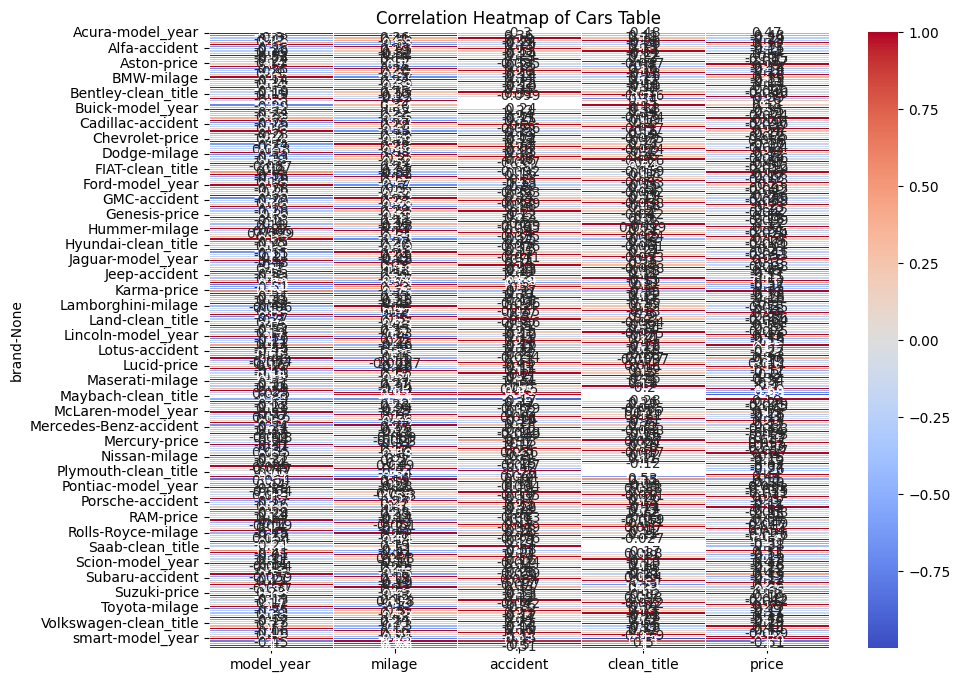

In [ ]:
import seaborn as sns
corr = df.groupby('brand').corr()

# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Cars Table')
plt.show()